In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv',encoding='latin1',usecols=[0,1])

In [4]:
df.sample(5)

,v1,v2
900,ham,Probably money worries. Things are coming due ...
2905,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."
602,ham,Speaking of does he have any cash yet?
600,ham,Mind blastin.. No more Tsunamis will occur fro...
2966,ham,NEFT Transaction with reference number &lt;#&...


In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df=df.rename(columns={'v1':'target','v2':'message'})

In [7]:
df.sample(5)

,target,message
5149,ham,Pls call me da. What happen.
4648,ham,Please protect yourself from e-threats. SIB ne...
252,ham,What you doing?how are you?
4200,ham,Wylie update: my weed dealer carlos went to fr...
5375,ham,I cant pick the phone right now. Pls send a me...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df.duplicated().sum()

0

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x19af7728fb0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'spam'),
  Text(1.014499764949479, -0.4251943401757036, 'ham')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

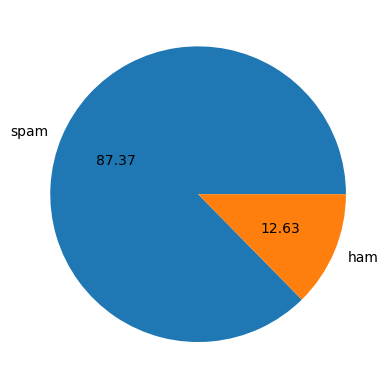

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['spam','ham'],autopct="%0.2f")

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [21]:
df['no_of_chars']= df['message'].apply(len)

In [22]:
df.head()

,target,message,no_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['no_of_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,message,no_of_chars,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['no_of_sents']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,message,no_of_chars,no_of_words,no_of_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['no_of_chars','no_of_words','no_of_sents']].describe()

,no_of_chars,no_of_words,no_of_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['target']==0][['no_of_chars','no_of_words','no_of_sents']].describe()

,no_of_chars,no_of_words,no_of_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target']==1][['no_of_chars','no_of_words','no_of_sents']].describe()

,no_of_chars,no_of_words,no_of_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_chars', ylabel='Count'>

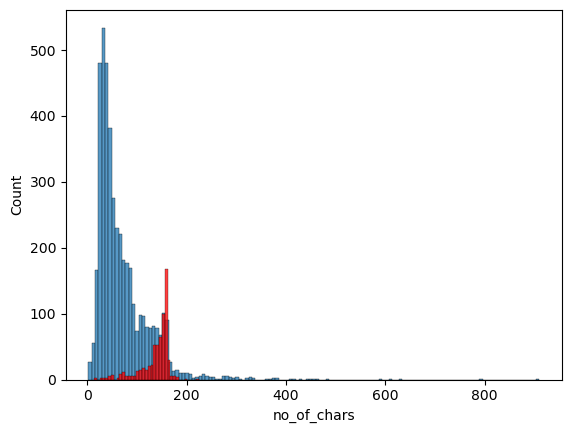

In [30]:
import seaborn as sns
sns.histplot(df[df['target']==0]['no_of_chars'])
sns.histplot(df[df['target']==1]['no_of_chars'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

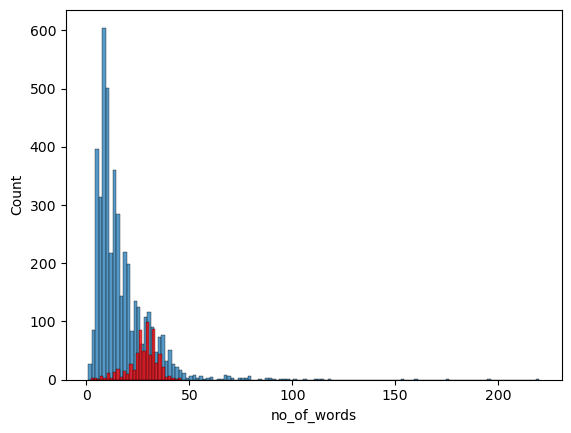

In [31]:
sns.histplot(df[df['target']==0]['no_of_words'])
sns.histplot(df[df['target']==1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sents', ylabel='Count'>

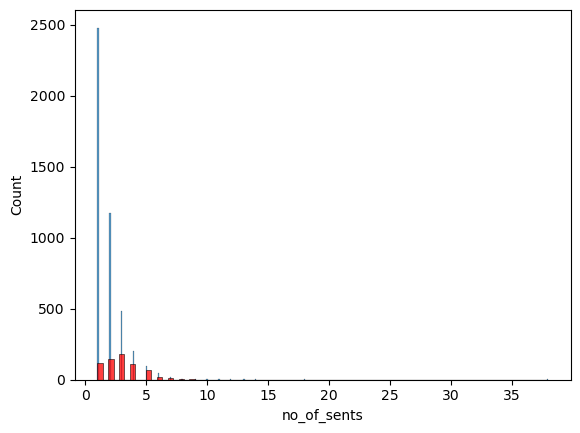

In [32]:
sns.histplot(df[df['target']==0]['no_of_sents'])
sns.histplot(df[df['target']==1]['no_of_sents'],color='red')

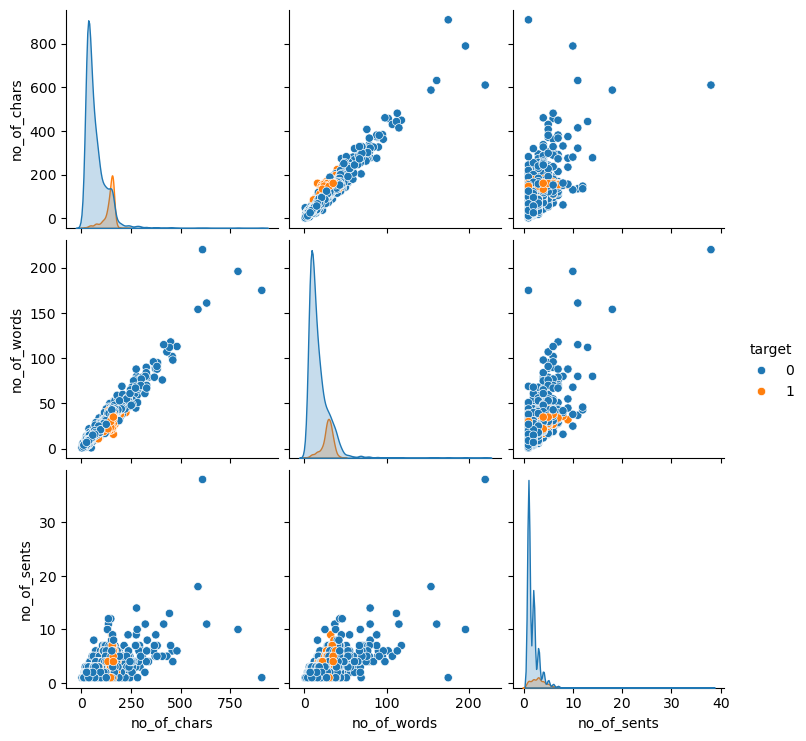

In [33]:
sns.pairplot(df,hue='target')

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()

def transforming(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    y = []
    for i in message:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
transforming('HHI hello this is important and u should know about matter it is quite that engineering is the foundation for ur job  I am 20 done')

'hhi hello import u know matter quit engin foundat ur job 20 done'

In [38]:
ps.stem('liking')

'like'

In [39]:
df['transformed_mesg']=df['message'].apply(transforming)

In [40]:
df.head()

,target,message,no_of_chars,no_of_words,no_of_sents,transformed_mesg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height = 500,min_font_size = 10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_mesg'].str.cat(sep=" "))

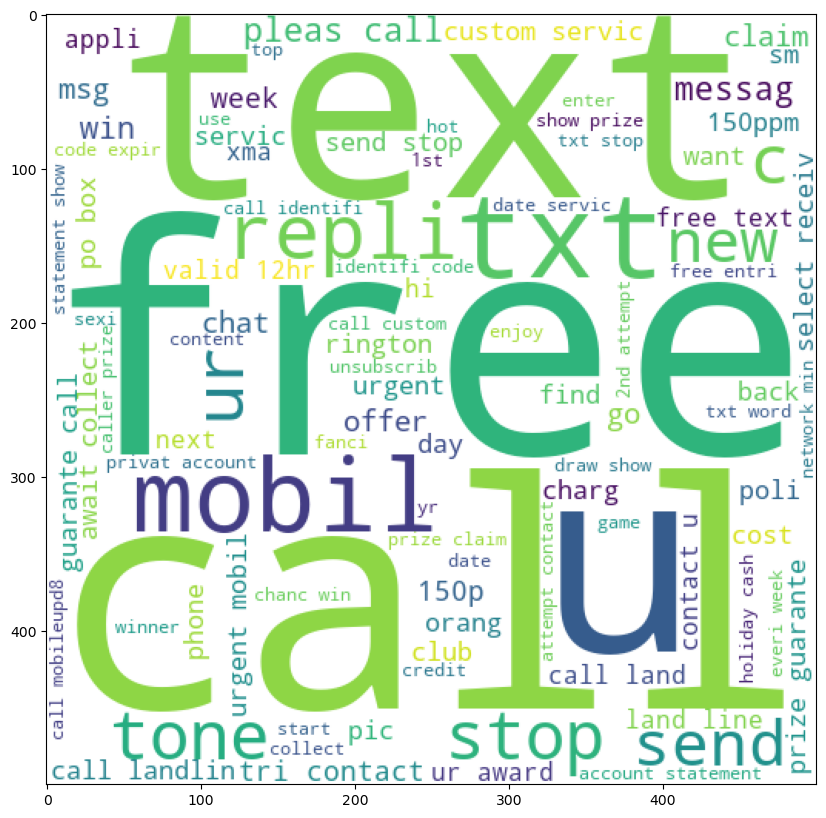

In [44]:
plt.figure(figsize =(15,10))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target']==0]['transformed_mesg'].str.cat(sep=" "))

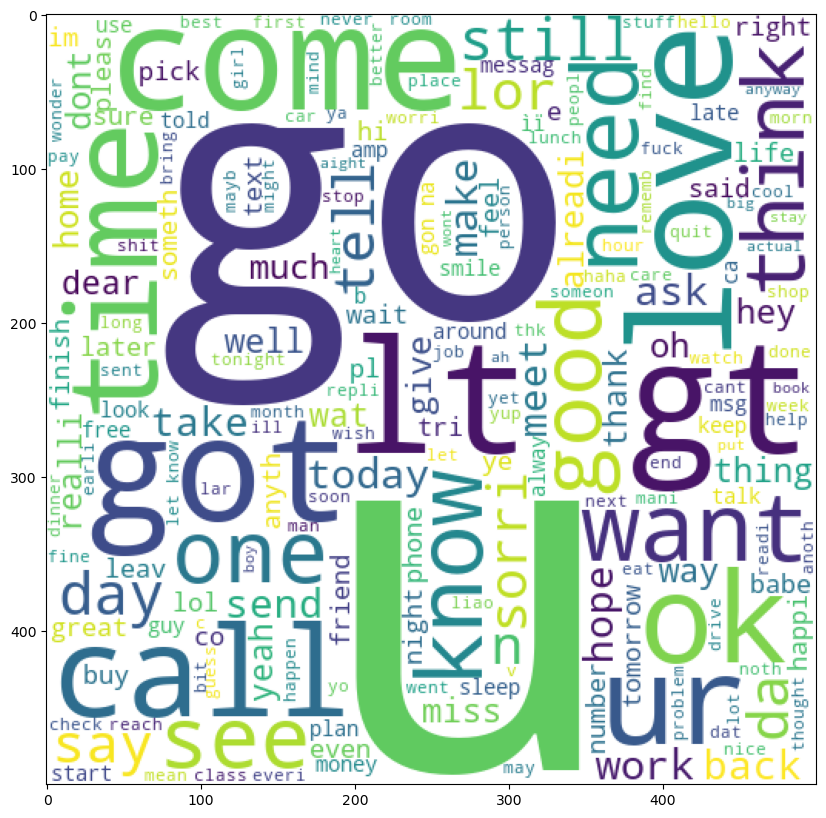

In [46]:
plt.figure(figsize =(15,10))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,message,no_of_chars,no_of_words,no_of_sents,transformed_mesg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus=[]
for mesg in df[df['target']==1]['transformed_mesg'].tolist():
    for word in mesg.split():
        spam_corpus.append(word)

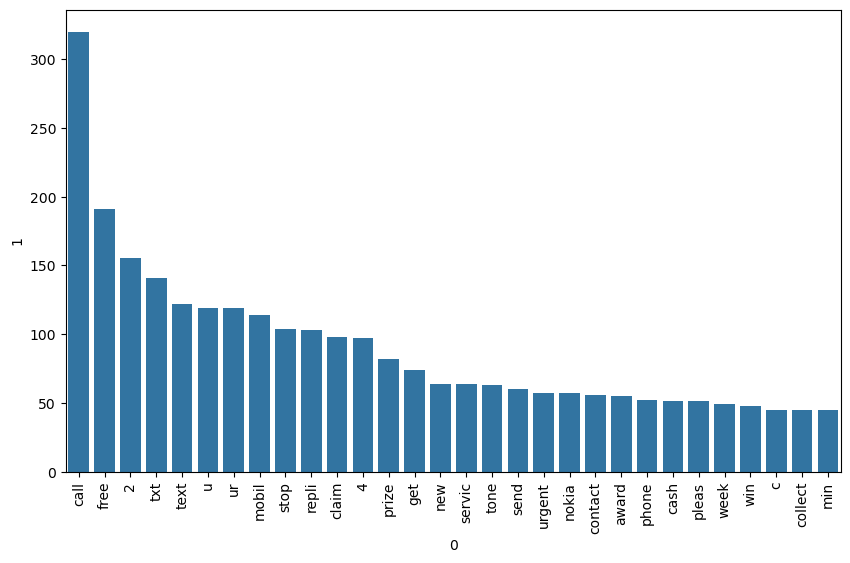

In [49]:
from collections import Counter 
plt.figure(figsize=(10,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]
for mesg in df[df['target']==0]['transformed_mesg'].tolist():
    for word in mesg.split():
        ham_corpus.append(word)

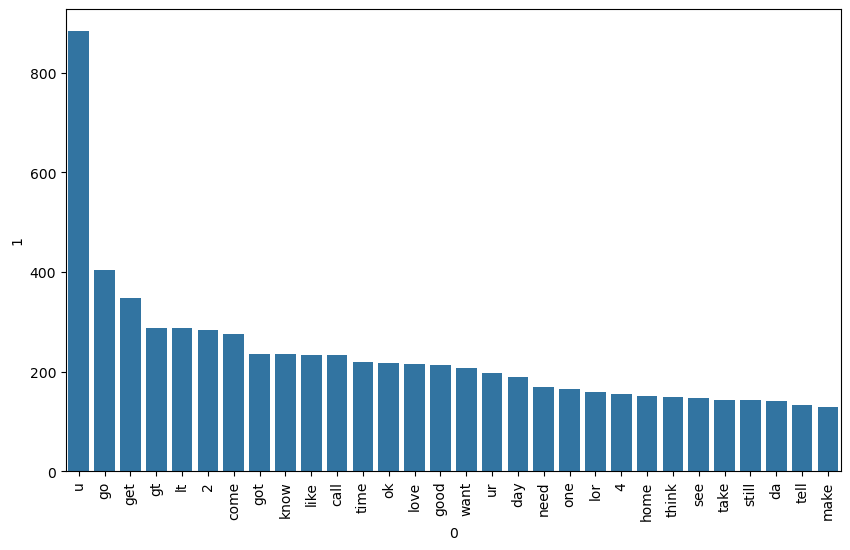

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features = 3000)

In [53]:
x=tfidf.fit_transform(df['transformed_mesg']).toarray()

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x=scaler.fit_transform(x)

In [55]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
y= df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [60]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(f"Accuracy score : {accuracy_score(y_test,y_pred1)}")
print(f"Precision score : {precision_score(y_test,y_pred1)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred1)}")

Accuracy score : 0.8669760247486465
Precision score : 0.5228758169934641
Confusion Matrix : 
[[961 146]
 [ 26 160]]


In [64]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(f"Accuracy score : {accuracy_score(y_test,y_pred2)}")
print(f"Precision score : {precision_score(y_test,y_pred2)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred2)}")

Accuracy score : 0.9775715390564579
Precision score : 0.9644970414201184
Confusion Matrix : 
[[1101    6]
 [  23  163]]


In [65]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(f"Accuracy score : {accuracy_score(y_test,y_pred3)}")
print(f"Precision score : {precision_score(y_test,y_pred3)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred3)}")

Accuracy score : 0.9729311678267595
Precision score : 0.9748427672955975
Confusion Matrix : 
[[1103    4]
 [  31  155]]


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [67]:
svc= SVC(kernel='sigmoid', gamma= 1.0)
knc=KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc= RandomForestClassifier(n_estimators =50, random_state=2)

In [68]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc}

In [69]:
def train_classifier(clf,X_train,y_train, X_test,y_test):
    clf.fit(X_train,y_train) 
    y_pred=clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy, precision

In [70]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9690641918020109, 0.9451219512195121)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy :",current_accuracy)
    print("Precision :",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy : 0.9690641918020109
Precision : 0.9451219512195121
For  KN
Accuracy : 0.9002320185614849
Precision : 1.0
For  NB
Accuracy : 0.9775715390564579
Precision : 0.9644970414201184
For  DT
Accuracy : 0.9358081979891725
Precision : 0.8551724137931035
For  LR
Accuracy : 0.9621036349574633
Precision : 0.9477124183006536
For  RF
Accuracy : 0.9698375870069605
Precision : 0.9932885906040269


In [72]:
performance_df= pd.DataFrame({'Algorithm':clfs.keys(),
                  'Accuracy':accuracy_scores,
                  'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.977572,0.964497
5,RF,0.969838,0.993289
0,SVC,0.969064,0.945122
4,LR,0.962104,0.947712
3,DT,0.935808,0.855172
1,KN,0.900232,1.000000


In [74]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [75]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.977572
1,RF,Accuracy,0.969838
2,SVC,Accuracy,0.969064
3,LR,Accuracy,0.962104
4,DT,Accuracy,0.935808
5,KN,Accuracy,0.900232
6,NB,Precision,0.964497
7,RF,Precision,0.993289
8,SVC,Precision,0.945122
9,LR,Precision,0.947712


In [77]:
from sklearn.ensemble import ExtraTreesClassifier

In [79]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [81]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [83]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [84]:
y_pred = voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9814385150812065
Precision 0.9821428571428571


In [85]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
clf = StackingClassifier(estimators= estimators,final_estimator=final_estimator)

In [88]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.979891724671307
Precision 0.9597701149425287


In [94]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [98]:
pickle.dump(mnb, open("model.pkl", "wb"))